# Linear Discriminant Analysis

In [1]:
# import all libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load datasets
dataset = pd.read_csv('/home/admin1/Machine Learning/WEEK_16/LDA/Wine.csv')

In [3]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
# sample data of given dataset
dataset.sample()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410,2


In [5]:
# split data into train and test
train_set,test_set = train_test_split(dataset,test_size=0.2)

In [6]:
train_set.shape,test_set.shape

((142, 14), (36, 14))

In [7]:
# split train dataset into train and cross validation
train, cross = train_test_split(train_set,test_size=0.2)

In [8]:
train.shape,cross.shape

((113, 14), (29, 14))

In [9]:
# seperate input features and labels train data
x_train = train.iloc[:,0:13].values
y_train = train.iloc[:,13].values

In [10]:
x_train.shape,y_train.shape

((113, 13), (113,))

In [11]:
# seperate input features and labels cross validation
x_cv = cross.iloc[:,0:13].values
y_cv = cross.iloc[:,13].values

In [12]:
x_cv.shape,y_cv.shape

((29, 13), (29,))

In [13]:
def feature_scaling(data):
    sc = StandardScaler()
    data = sc.fit_transform(data)
    return data,sc

In [14]:
# apply feature scaling on train data
x_train,scale_obj_train = feature_scaling(x_train)

In [15]:
# apply feature scaling on cross validation
x_cv,scale_obj_cv= feature_scaling(x_cv)

# Applying LDA

In [16]:
# Applying dimensional reduction technique i.e PCA
lda =LDA(n_components=2)
x_train = lda.fit_transform(x_train,y_train)
x_cv = lda.transform(x_cv)

The PCA class contains explained_variance _ratio_ which returns the variance caused by each of the principal components.

# Training Model

In [17]:
# fitting RandomForestClassifier 
classifier  = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# make predictions on train data and cross validation
predict_train = classifier.predict(x_train)
predict_cv = classifier.predict(x_cv)

In [19]:
# performance evaluation on train data
cm = confusion_matrix(y_train, predict_train)  
print(cm)  
train_acc = accuracy_score(y_train, predict_train)*100
print('Accuracy on train:',train_acc)

[[44  0  0]
 [ 0 39  0]
 [ 0  0 30]]
Accuracy on train: 100.0


In [20]:
# performance evaluation on cross validation
cm = confusion_matrix(y_cv, predict_cv)  
print(cm)  
cross_acc = accuracy_score(y_cv, predict_cv)*100
print('Accuracy on cross:',cross_acc)

[[ 6  0  0]
 [ 1 13  0]
 [ 0  0  9]]
Accuracy on cross: 96.55172413793103


In [21]:
# visualization on graph
def visualization(x,y,classifier):
        x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01 ))
        plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('yellow','green','pink')))
        
        # limit the age and salary         
        plt.xlim(x1.min(),x1.max())
        plt.ylim(x2.min(),x2.max())
       
        # plots all the datapoints in graph         
        for i,j in enumerate(np.unique(y)):
            plt.scatter(x[y==j,0],x[y==j,1],c=ListedColormap(('red','green','blue'))(i),label=j)

        plt.title('RandomForestClassifier(Training  Set)')
        plt.xlabel('wine ingredients')
        plt.ylabel('customer segment')
        plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


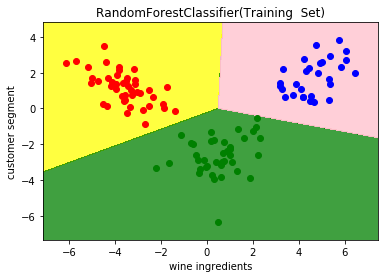

In [22]:
# visualization of train data
visualization(x_train,y_train,classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


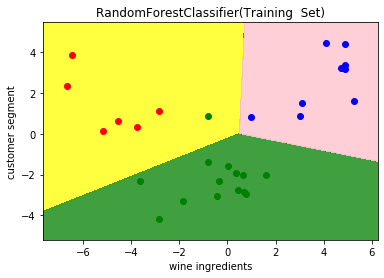

In [23]:
# visualization of train data
visualization(x_cv,y_cv,classifier)

In [24]:
# saving train model
import pickle
if cross_acc > 70:
    file_object = open('train.pkl','wb')
    pickle.dump(classifier,file_object)
    pickle.dump(scale_obj_train,file_object)
    pickle.dump(lda,file_object)
    file_object.close()
    print('Your model is saved successfully')

Your model is saved successfully


In [25]:
# saving test data into pickle
file_object = open('test.pkl','wb')
pickle.dump(test_set,file_object)
file_object.close()